# Pandas - Data Aggregation

1. Groupby
2. Map Functions
3. Pivot
4. Agg functions

In [8]:
# Let's reload our dataframe
import pandas as pd

file_name = "amazon.csv"
df = pd.read_csv(file_name, encoding = "ISO-8859-1")

# Introuding the Map Function
month_translations = {'Janeiro': 'January',
'Fevereiro': 'February',
'Março': 'March',
'Abril': 'April',
'Maio': 'May',
'Junho': 'June',
'Julho': 'July',
'Agosto': 'August',
'Setembro': 'September',
'Outubro': 'October',
'Novembro': 'November',
'Dezembro': 'December'}

df["month"] = df["month"].map(month_translations)
df.head(10)

,year,state,month,number,date
0,1998,Acre,January,0.0,1998-01-01
1,1999,Acre,January,0.0,1999-01-01
2,2000,Acre,January,0.0,2000-01-01
3,2001,Acre,January,0.0,2001-01-01
4,2002,Acre,January,0.0,2002-01-01
5,2003,Acre,January,10.0,2003-01-01
6,2004,Acre,January,0.0,2004-01-01
7,2005,Acre,January,12.0,2005-01-01
8,2006,Acre,January,4.0,2006-01-01
9,2007,Acre,January,0.0,2007-01-01


# Using the Groupby function 

This is one of the most useful data analysis tools provided by Pandas. It allows us to common segments of data and perform an operation on. For example, we can group our 'States' and find the sum total of fires per state. 

In [9]:
# First let's aggregate date based on each State
# We'll create our groupby object

df.groupby('state')

In [10]:
# How do we use our object?

state_groups = df.groupby('state')
state_groups.get_group('Rio')

,year,state,month,number,date
4303,1998,Rio,January,0.0,1998-01-01
4304,1999,Rio,January,0.0,1999-01-01
4305,2000,Rio,January,0.0,2000-01-01
4306,2001,Rio,January,0.0,2001-01-01
4307,2002,Rio,January,0.0,2002-01-01
...,...,...,...,...,...
5015,2012,Rio,December,38.0,2012-01-01
5016,2013,Rio,December,62.0,2013-01-01
5017,2014,Rio,December,31.0,2014-01-01
5018,2015,Rio,December,42.0,2015-01-01


In [11]:
# Let's look at the groups we made

# It is a dictionary where each key corresponds to a state name
# The values are the index ranges for each group

state_groups.groups

{'Acre': Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
             ...
             229, 230, 231, 232, 233, 234, 235, 236, 237, 238],
            dtype='int64', length=239),
 'Alagoas': Int64Index([239, 240, 241, 242, 243, 244, 245, 246, 247, 248,
             ...
             469, 470, 471, 472, 473, 474, 475, 476, 477, 478],
            dtype='int64', length=240),
 'Amapa': Int64Index([479, 480, 481, 482, 483, 484, 485, 486, 487, 488,
             ...
             708, 709, 710, 711, 712, 713, 714, 715, 716, 717],
            dtype='int64', length=239),
 'Amazonas': Int64Index([718, 719, 720, 721, 722, 723, 724, 725, 726, 727,
             ...
             947, 948, 949, 950, 951, 952, 953, 954, 955, 956],
            dtype='int64', length=239),
 'Bahia': Int64Index([ 957,  958,  959,  960,  961,  962,  963,  964,  965,  966,
             ...
             1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195],
            dtype='int64', length=239),
 'Ceara': I

In [12]:
# We can use Size to get a count of the number of items in each group
state_groups.size()

state
Acre                239
Alagoas             240
Amapa               239
Amazonas            239
Bahia               239
Ceara               239
Distrito Federal    239
Espirito Santo      239
Goias               239
Maranhao            239
Mato Grosso         478
Minas Gerais        239
Paraiba             478
Pará                239
Pernambuco          239
Piau                239
Rio                 717
Rondonia            239
Roraima             239
Santa Catarina      239
Sao Paulo           239
Sergipe             239
Tocantins           239
dtype: int64

# Let's now use some Aggregation funtions

* mean()
* size()
* count()
* sum()
* min()
* max()

In [13]:
state_groups.sum()

,year,number
state,,
Acre,479783,18464.030
Alagoas,481800,4644.000
Amapa,479783,21831.576
Amazonas,479783,30650.129
Bahia,479783,44746.226
Ceara,479783,30428.063
Distrito Federal,479783,3561.000
Espirito Santo,479783,6546.000
Goias,479783,37695.520


In [14]:
state_groups.mean()

# Note the top left cell named 'state' is now the index
# Previously the index was numbered numerically
# The columns year and number_of_fires are the grouped means


,year,number
state,,
Acre,2007.460251,77.255356
Alagoas,2007.500000,19.350000
Amapa,2007.460251,91.345506
Amazonas,2007.460251,128.243218
Bahia,2007.460251,187.222703
Ceara,2007.460251,127.314071
Distrito Federal,2007.460251,14.899582
Espirito Santo,2007.460251,27.389121
Goias,2007.460251,157.721841


# Combining our groupby into one concise statement

In [15]:
df.groupby('state')['number'].mean()

# In the above code:
# 'state' is what we're grouping 
# 'number_of_fires' is column who's values we're running our aggregate mean function on
# our index will be 'state' after running this

state
Acre                 77.255356
Alagoas              19.350000
Amapa                91.345506
Amazonas            128.243218
Bahia               187.222703
Ceara               127.314071
Distrito Federal     14.899582
Espirito Santo       27.389121
Goias               157.721841
Maranhao            105.142808
Mato Grosso         201.351523
Minas Gerais        156.800243
Paraiba             109.698573
Pará                102.561272
Pernambuco          102.502092
Piau                158.174674
Rio                  62.985865
Rondonia             84.876272
Roraima             102.029598
Santa Catarina      101.924067
Sao Paulo           213.896226
Sergipe              13.543933
Tocantins           141.037176
Name: number, dtype: float64

# Pivot Table

For excel users, you may be thinking this 

In [16]:
import numpy as np

df.pivot_table(values='number', index='state', aggfunc=np.mean)

,number
state,
Acre,77.255356
Alagoas,19.350000
Amapa,91.345506
Amazonas,128.243218
Bahia,187.222703
Ceara,127.314071
Distrito Federal,14.899582
Espirito Santo,27.389121
Goias,157.721841


In [17]:
# Another feature provided by the Pivot function 
# is that we can add "All" (see last line) which gives the mean of all

df.pivot_table(values='number', index='state', aggfunc=np.mean, margins=True)

,number
state,
Acre,77.255356
Alagoas,19.350000
Amapa,91.345506
Amazonas,128.243218
Bahia,187.222703
Ceara,127.314071
Distrito Federal,14.899582
Espirito Santo,27.389121
Goias,157.721841


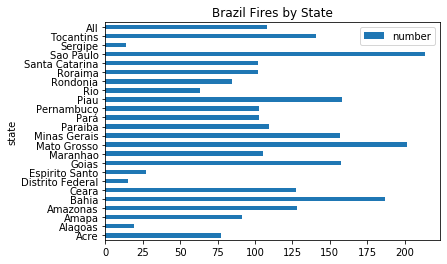

In [20]:
# Can be useful when creating a plot

fires_per_state = df.pivot_table(values='number', index='state', aggfunc=np.mean, margins=True)

# We push the horizontal scale to the right just to make it more aesthetic
max_val = fires_per_state["number"].max() + 10

fires_per_state.plot(kind='barh', title='Brazil Fires by State', xlim=(0,max_val), legend=True)

# Aggregating Multiple Columns Using Pivot Tables

In [21]:
df.shape[0]

6454

In [22]:
# Before we begin, let's create a column of fake date called "severity"
# in this column we'll use a rating of 1 - 5 to indicate severity of each fire

import numpy as np

df['severity'] = np.random.randint(1, 5, df.shape[0])
df.head(10)

,year,state,month,number,date,severity
0,1998,Acre,January,0.0,1998-01-01,2
1,1999,Acre,January,0.0,1999-01-01,4
2,2000,Acre,January,0.0,2000-01-01,2
3,2001,Acre,January,0.0,2001-01-01,1
4,2002,Acre,January,0.0,2002-01-01,4
5,2003,Acre,January,10.0,2003-01-01,4
6,2004,Acre,January,0.0,2004-01-01,1
7,2005,Acre,January,12.0,2005-01-01,3
8,2006,Acre,January,4.0,2006-01-01,2
9,2007,Acre,January,0.0,2007-01-01,3


## Format for aggregating multiple columns of data 


**DataFrame.pivot_table([column1_values, column2_values], column_index)**

In [23]:
# Now let's aggregate multiple columns
# Previous we did it like:
# df.pivot_table(values='number_of_fires', index='state', aggfunc=np.mean)

df.pivot_table(['number', 'severity'], 'state')

,number,severity
state,,
Acre,77.255356,2.435146
Alagoas,19.350000,2.445833
Amapa,91.345506,2.552301
Amazonas,128.243218,2.439331
Bahia,187.222703,2.443515
Ceara,127.314071,2.397490
Distrito Federal,14.899582,2.451883
Espirito Santo,27.389121,2.481172
Goias,157.721841,2.531381


In [24]:
# Stating things more explicitly and adding Margins
df.pivot_table(values=['number', 'severity'], index='state', aggfunc=np.mean, margins=True)

,number,severity
state,,
Acre,77.255356,2.435146
Alagoas,19.350000,2.445833
Amapa,91.345506,2.552301
Amazonas,128.243218,2.439331
Bahia,187.222703,2.443515
Ceara,127.314071,2.397490
Distrito Federal,14.899582,2.451883
Espirito Santo,27.389121,2.481172
Goias,157.721841,2.531381


In [25]:
# Aggregating with multiple functions on multiple columns

df.pivot_table(['number', 'severity'], 'state', aggfunc=[np.mean, np.min, np.max], margins=True)

mean             amin            amax         
                      number  severity number severity number severity
state                                                                 
Acre               77.255356  2.435146    0.0        1  960.0        4
Alagoas            19.350000  2.445833    0.0        1  162.0        4
Amapa              91.345506  2.552301    0.0        1  969.0        4
Amazonas          128.243218  2.439331    0.0        1  998.0        4
Bahia             187.222703  2.443515    0.0        1  995.0        4
Ceara             127.314071  2.397490    0.0        1  995.0        4
Distrito Federal   14.899582  2.451883    0.0        1  196.0        4
Espirito Santo     27.389121  2.481172    0.0        1  307.0        4
Goias             157.721841  2.531381    0.0        1  943.0        4
Maranhao          105.142808  2.451883    0.0        1  972.0        4
Mato Grosso       201.351523  2.514644    0.0        1  979.0        4
Minas Gerais      156.800243  2.606695    0.0        1  959.0        4
Paraiba           109.698573  2.504184    0.0        1  987.0        4
Pará              102.561272  2.644351    0.0        1  982.0        4
Pernambuco        102.502092  2.556485    0.0        1  859.0        4
Piau              158.174674  2.410042    0.0        1  943.0        4
Rio                62.985865  2.513250    0.0        1  885.0        4
Rondonia           84.876272  2.560669    0.0        1  969.0        4
Roraima           102.029598  2.514644    0.0        1  820.0        4
Santa Catarina    101.924067  2.405858    0.0        1  765.0        4
Sao Paulo         213.896226  2.602510    0.0        1  981.0        4
Sergipe            13.543933  2.539749    0.0        1  198.0        4
Tocantins         141.037176  2.384937    0.0        1  989.0        4
All               108.293163  2.497521    0.0        1  998.0        4

# Learning to use GroupBy Agg

### The syntax is as follows:

**DataFrame.groupby(index)[column1].agg(function)**

In [26]:
# Similarly we can use the 'agg' function with groupbys

df.groupby('state')['number'].agg(np.mean)

state
Acre                 77.255356
Alagoas              19.350000
Amapa                91.345506
Amazonas            128.243218
Bahia               187.222703
Ceara               127.314071
Distrito Federal     14.899582
Espirito Santo       27.389121
Goias               157.721841
Maranhao            105.142808
Mato Grosso         201.351523
Minas Gerais        156.800243
Paraiba             109.698573
Pará                102.561272
Pernambuco          102.502092
Piau                158.174674
Rio                  62.985865
Rondonia             84.876272
Roraima             102.029598
Santa Catarina      101.924067
Sao Paulo           213.896226
Sergipe              13.543933
Tocantins           141.037176
Name: number, dtype: float64

In [27]:
## Applying it to multiple columns

df.groupby('state')['number', 'severity'].agg(np.mean)

,number,severity
state,,
Acre,77.255356,2.435146
Alagoas,19.350000,2.445833
Amapa,91.345506,2.552301
Amazonas,128.243218,2.439331
Bahia,187.222703,2.443515
Ceara,127.314071,2.397490
Distrito Federal,14.899582,2.451883
Espirito Santo,27.389121,2.481172
Goias,157.721841,2.531381


In [28]:
## Applying multiple functions

df.groupby('state')['number', 'severity'].agg([np.mean, np.max])

number         severity     
                        mean   amax      mean amax
state                                             
Acre               77.255356  960.0  2.435146    4
Alagoas            19.350000  162.0  2.445833    4
Amapa              91.345506  969.0  2.552301    4
Amazonas          128.243218  998.0  2.439331    4
Bahia             187.222703  995.0  2.443515    4
Ceara             127.314071  995.0  2.397490    4
Distrito Federal   14.899582  196.0  2.451883    4
Espirito Santo     27.389121  307.0  2.481172    4
Goias             157.721841  943.0  2.531381    4
Maranhao          105.142808  972.0  2.451883    4
Mato Grosso       201.351523  979.0  2.514644    4
Minas Gerais      156.800243  959.0  2.606695    4
Paraiba           109.698573  987.0  2.504184    4
Pará              102.561272  982.0  2.644351    4
Pernambuco        102.502092  859.0  2.556485    4
Piau              158.174674  943.0  2.410042    4
Rio                62.985865  885.0  2.513250    4
Rondonia           84.876272  969.0  2.560669    4
Roraima           102.029598  820.0  2.514644    4
Santa Catarina    101.924067  765.0  2.405858    4
Sao Paulo         213.896226  981.0  2.602510    4
Sergipe            13.543933  198.0  2.539749    4
Tocantins         141.037176  989.0  2.384937    4

# Using custom Agg functions

In [29]:
def max_minus_mean(grouped_data):
    return(grouped_data.max() - grouped_data.mean())

df.groupby('state')['number'].agg(max_minus_mean)

state
Acre                882.744644
Alagoas             142.650000
Amapa               877.654494
Amazonas            869.756782
Bahia               807.777297
Ceara               867.685929
Distrito Federal    181.100418
Espirito Santo      279.610879
Goias               785.278159
Maranhao            866.857192
Mato Grosso         777.648477
Minas Gerais        802.199757
Paraiba             877.301427
Pará                879.438728
Pernambuco          756.497908
Piau                784.825326
Rio                 822.014135
Rondonia            884.123728
Roraima             717.970402
Santa Catarina      663.075933
Sao Paulo           767.103774
Sergipe             184.456067
Tocantins           847.962824
Name: number, dtype: float64

In [30]:
# Converting our series result back into a dataFrame

pd.DataFrame(df.groupby('state')['number'].agg(max_minus_mean)).reset_index()

,state,number
0,Acre,882.744644
1,Alagoas,142.650000
2,Amapa,877.654494
3,Amazonas,869.756782
4,Bahia,807.777297
5,Ceara,867.685929
6,Distrito Federal,181.100418
7,Espirito Santo,279.610879
8,Goias,785.278159
9,Maranhao,866.857192
